In [2]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calc_p0(traffic_intensity, n, M):
    series = sum(traffic_intensity ** i / factorial(i) for i in range(n + 1))
    correction = traffic_intensity ** (n + 1) * (1 - (traffic_intensity / n) ** M) / (factorial(n) * n * (1 - traffic_intensity / n))
    return (series + correction) ** -1

def calc_p_service(traffic_intensity, n, M, p0):
    return traffic_intensity ** (n + M) * p0 / (n ** M * factorial(n))

def calc_avg_queue(traffic_intensity, n, M, p0):
    numerator = traffic_intensity ** (n + 1) * (1 - (traffic_intensity / n) ** M * (M + 1 - M / n * traffic_intensity)) * p0
    denominator = factorial(n) * n * (1 - traffic_intensity / n) ** 2
    return numerator / denominator


In [4]:
# Мастера, стулья, интенсивности
n, M = 3, 3
arrival_rate, service_rate = 12, 1 / (20 / 60)  # клиенты в час

traffic_intensity = arrival_rate / service_rate
p0 = calc_p0(traffic_intensity, n, M)

# Вероятности
p_service = calc_p_service(traffic_intensity, n, M, p0)
Q = 1 - p_service

# Эффективность
lambda_prime = arrival_rate * Q
k_occupied = lambda_prime / service_rate
l_queue = calc_avg_queue(traffic_intensity, n, M, p0)
w_wait = l_queue / arrival_rate
m_total = l_queue + k_occupied
u_system = m_total / arrival_rate

# Результаты
print(f'\np0 = {p0:.3f}, π = {p_service:.3f}, Q = {Q:.3f}, λ\' = {lambda_prime:.2f}, k_зан = {k_occupied:.2f}, l = {l_queue:.2f}, w = {w_wait:.2f}, m = {m_total:.2f}, u = {u_system:.2f}\n')



p0 = 0.012, π = 0.308, Q = 0.692, λ' = 8.31, k_зан = 2.77, l = 1.56, w = 0.13, m = 4.33, u = 0.36



In [5]:
# Сетка для графиков
arr_rate, srv_rate = np.meshgrid(np.linspace(0.1, 10, 50), np.linspace(0.1, 10, 50))
traffic_intensity_grid = arr_rate / srv_rate

# Расчет для сетки
p0_grid = calc_p0(traffic_intensity_grid, n, M)
p_service_grid = calc_p_service(traffic_intensity_grid, n, M, p0_grid)
Q_grid = 1 - p_service_grid
lambda_prime_grid = arr_rate * Q_grid
k_occupied_grid = lambda_prime_grid / srv_rate
l_queue_grid = calc_avg_queue(traffic_intensity_grid, n, M, p0_grid)
w_wait_grid = l_queue_grid / arr_rate
m_total_grid = l_queue_grid + k_occupied_grid
u_system_grid = m_total_grid / arr_rate


In [6]:
# Параметры для графиков
params = {
    'p0 (Вероятность свободного состояния)': p0_grid,
    'π (Вероятность отказа в обслуживании)': p_service_grid,
    'Q (Относительная пропускная способность)': Q_grid,
    'λ\' (Абсолютная пропускная способность)': lambda_prime_grid,
    'k_зан (Среднее число занятых каналов)': k_occupied_grid,
    'l (Среднее число заявок в очереди)': l_queue_grid,
    'w (Среднее время ожидания)': w_wait_grid,
    'm (Среднее число заявок в системе)': m_total_grid,
    'u (Среднее время пребывания заявки в системе)': u_system_grid
}


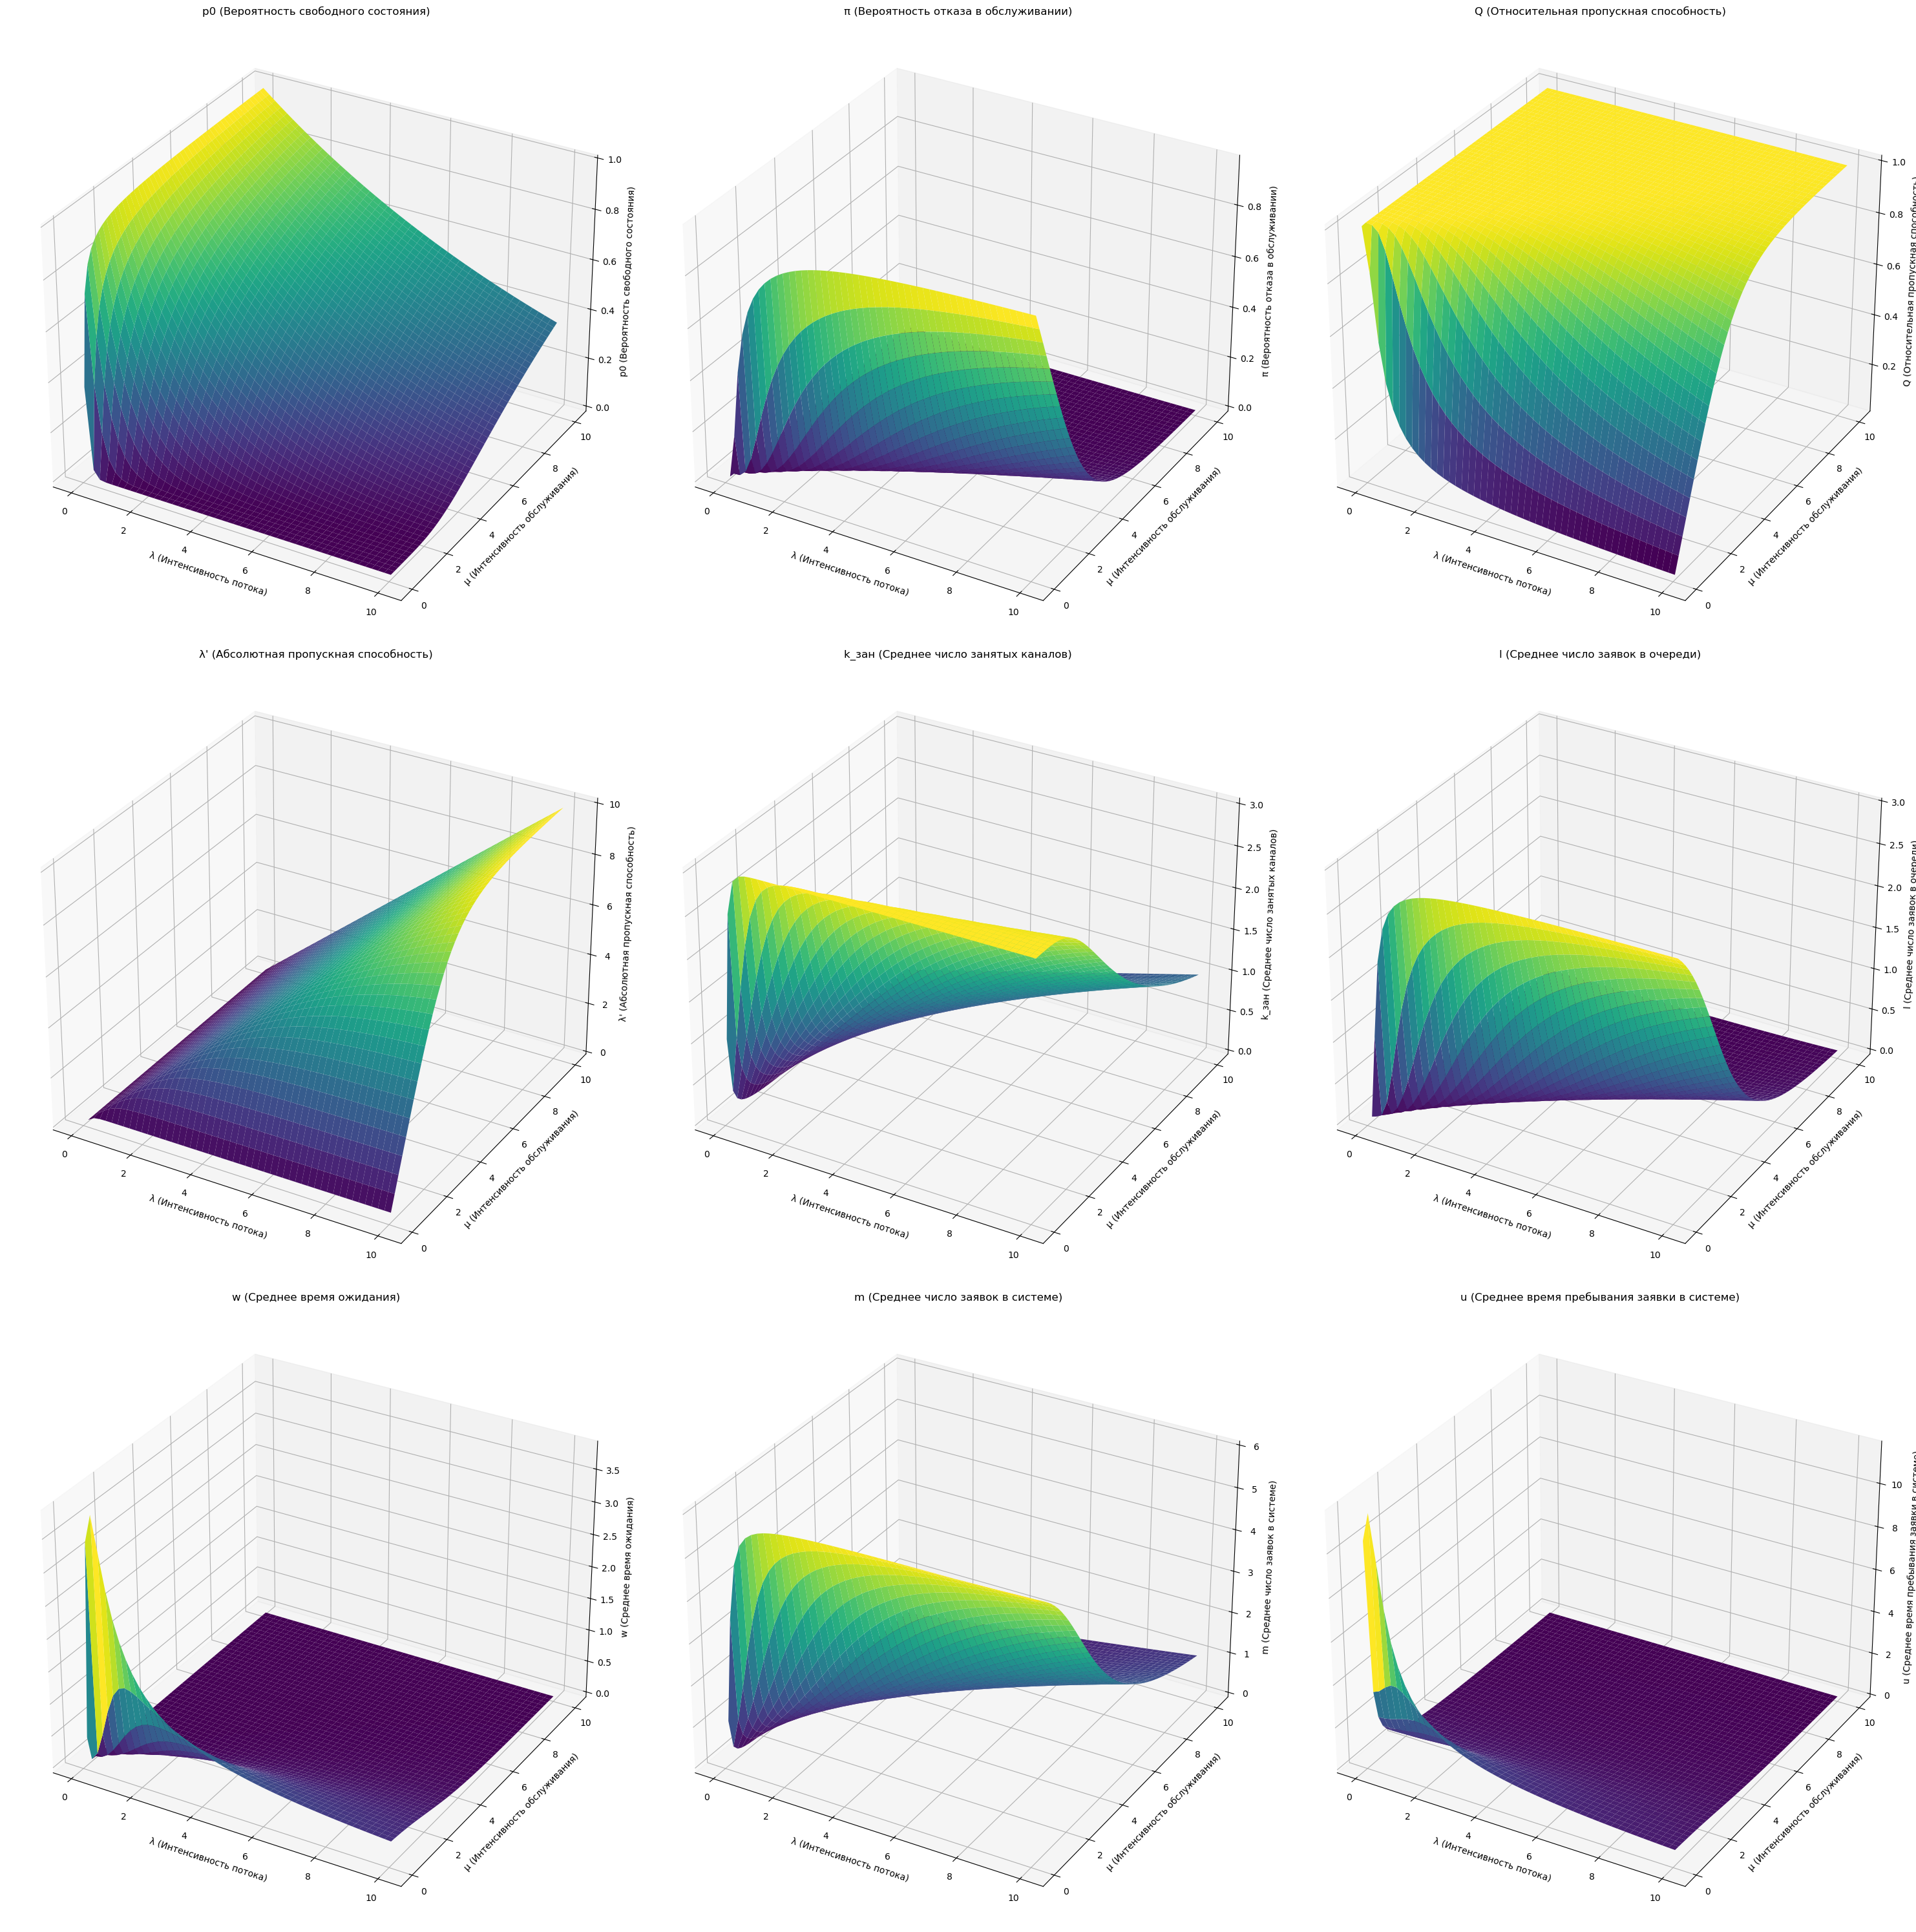

In [7]:
# Построение 3D графиков
fig = plt.figure(figsize=(30, 30))
j = 1

for i, (name, value) in enumerate(params.items()):
    ax = fig.add_subplot(3, 3, j, projection='3d')
    j+=1
    ax.plot_surface(arr_rate, srv_rate, value, cmap='viridis')
    ax.set_title(name)
    ax.set_xlabel('λ (Интенсивность потока)')
    ax.set_ylabel('μ (Интенсивность обслуживания)')
    ax.set_zlabel(name)

plt.tight_layout()
plt.show()
